In [1]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# shows how many values are missing per column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# replaces missing values with appropriate placeholders
df['country'].fillna('Unknown', inplace= True)
df['director'].fillna('Not Available', inplace= True)
df['cast'].fillna('Not Available', inplace= True)
df['rating'].fillna('Not Rated', inplace= True)

In [9]:
# convert columns to correct data types by converting date_added aolumn to datetime format so that we can extract year, month, etc
df['data_added'] = pd.to_datetime(df['date_added'])

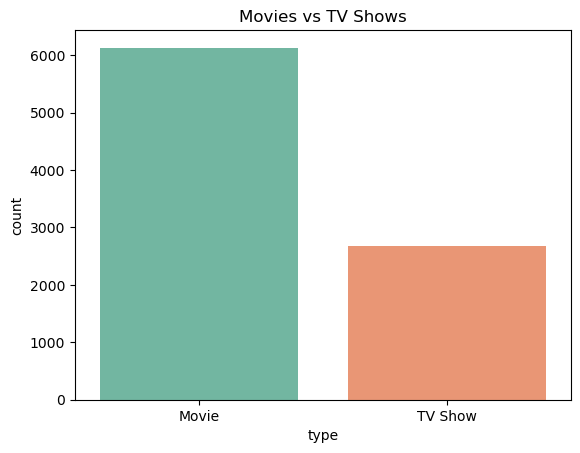

In [13]:
# count of movies vs TV shows by plotting a bar chart
sns.countplot(data= df, x= 'type', palette= 'Set2')
plt.title("Movies vs TV Shows")
plt.show()

BAR GRAPH

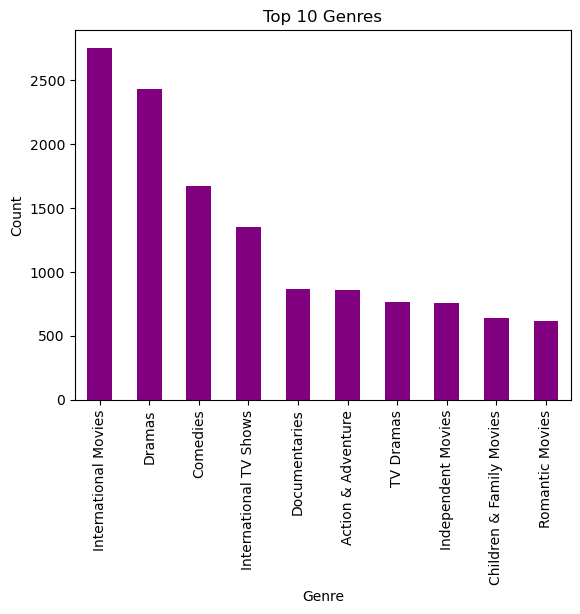

In [16]:
# plotting top 10 netflix genres
# df['listed_in']= column contains genres for each title
# str.split(', ')= splits genre strings by comma and space
# explode()= seperates rows, so if one title had teo genres, it now counts as two rows- one for each genre.
# value_counts()= counts each individual genre
# head(10)= selects top 10 most frequent genres
# plot(kind= 'bar', color= 'purple')= creates purple vertical bqr chart
# plt.xticks(rotation= 45)= rotates x axis label by 45 degree to avoid overlapping if genres names are long.
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind= 'bar', color= 'purple')
plt.title("Top 10 Genres")
plt.ylabel("Count")
plt.xlabel("Genre")
# plt.xticks(rotation= 45)
plt.show()

LINE GRAPH

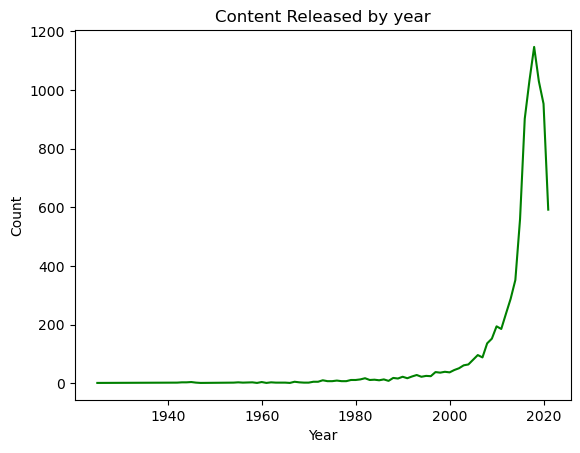

In [18]:
# line graph on how many titles released per year
df['release_year'].value_counts().sort_index().plot(kind='line', color= 'green')
plt.title("Content Released by year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

BAR HORIZONTAL GRAPH

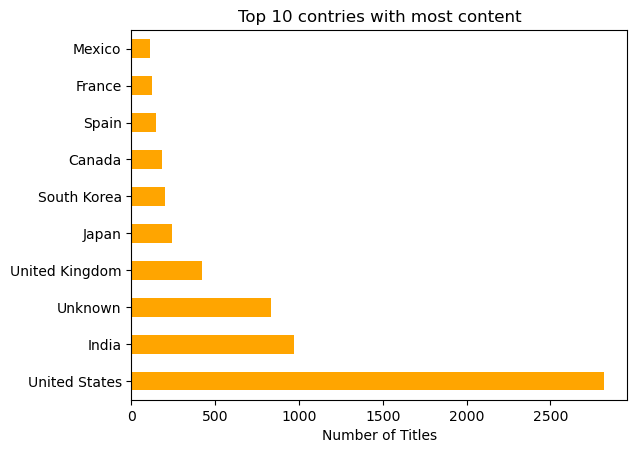

In [19]:
# Top 10 contries by content
df['country'].value_counts().head(10).plot(kind= 'barh', color='orange')
plt.title("Top 10 contries with most content")
plt.xlabel("Number of Titles")
plt.show()

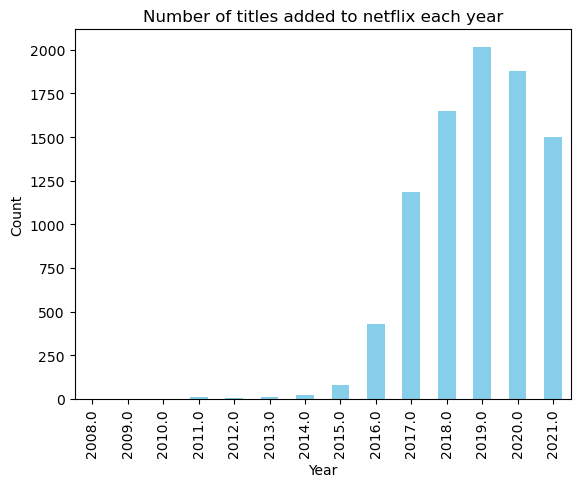

In [20]:
# Titles added per year SHOWN WITH BAR GRAPH
df['year_added']= df['data_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind= 'bar', color= 'skyblue')
plt.title("Number of titles added to netflix each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

HEATMAP

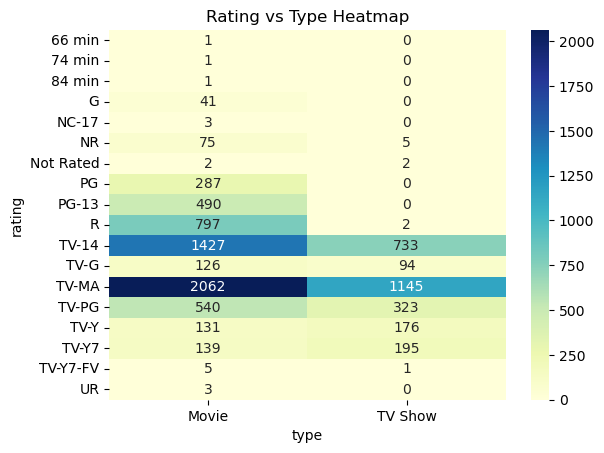

In [27]:
# heatmap to visualize relationship bw content rating(TV, MA, PG, ETC) and content type(movie or TV show)
# pd.crosstab(df['rating'], df['type'])
sns.heatmap(pd.crosstab(df['rating'], df['type']), annot= True, fmt= 'd', cmap= 'YlGnBu')
plt.title("Rating vs Type Heatmap")
plt.show()

In [29]:
pip install wordcloud

     ------------------------------------ 299.8/299.8 kB 440.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


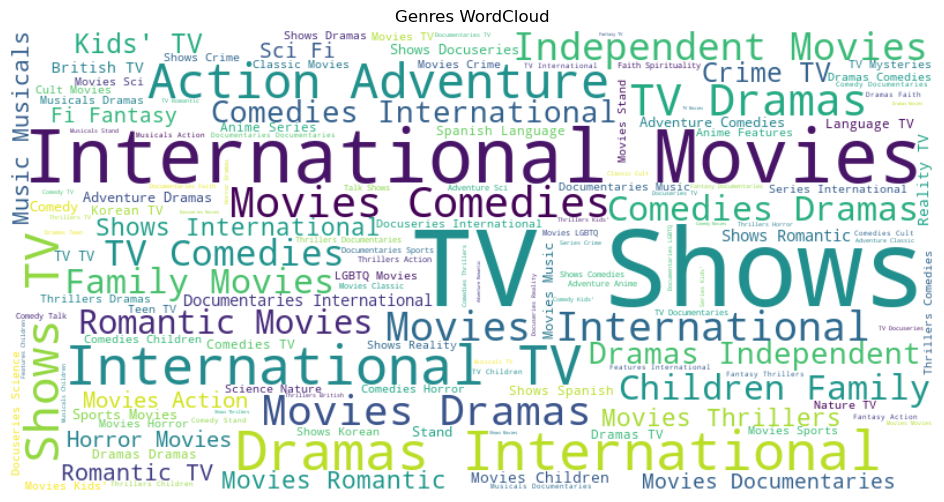

In [30]:
# beautiful visualization to show most frequent genre related words
from wordcloud import WordCloud

text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Genres WordCloud")
plt.show()

In [31]:
print("Key Insights:")
print("1. Netflix has more Movies than TV Shows.")
print("2. Drama and International content are the most popular genres.")
print("3. Content release spiked after 2015.")
print("4. Most content is from the United States.")
print("5. The highest number of titles were added in 2019 and 2020.")

Key Insights:
1. Netflix has more Movies than TV Shows.
2. Drama and International content are the most popular genres.
3. Content release spiked after 2015.
4. Most content is from the United States.
5. The highest number of titles were added in 2019 and 2020.
